##0120200105 - Avadhoot Tavhare
##0120200083 - Prerna Joshi

In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path  = os.chdir('/content/drive/My Drive/dataset')

In [ ]:
dataset_path = '/content/drive/My Drive/dataset'

# Initialize empty lists to store images and labels
images = []
labels = []

# Defining a dictionary to map class names to labels (e.g., 'yes' to 1, 'no' to 0)
class_mapping = {'yes': 1, 'no': 0}

# Looping through the directories and load the images
for class_name, class_label in class_mapping.items():
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

Displaying images for class yes:


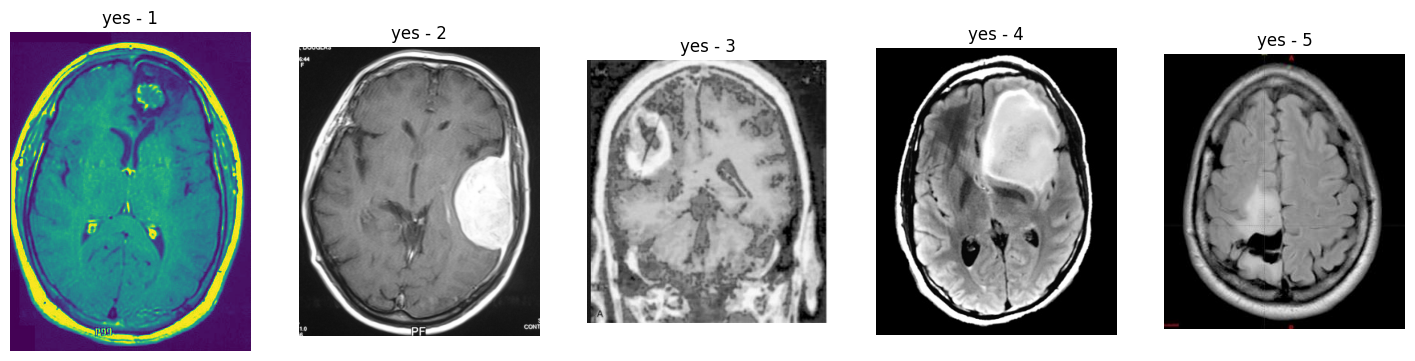

Displaying images for class no:


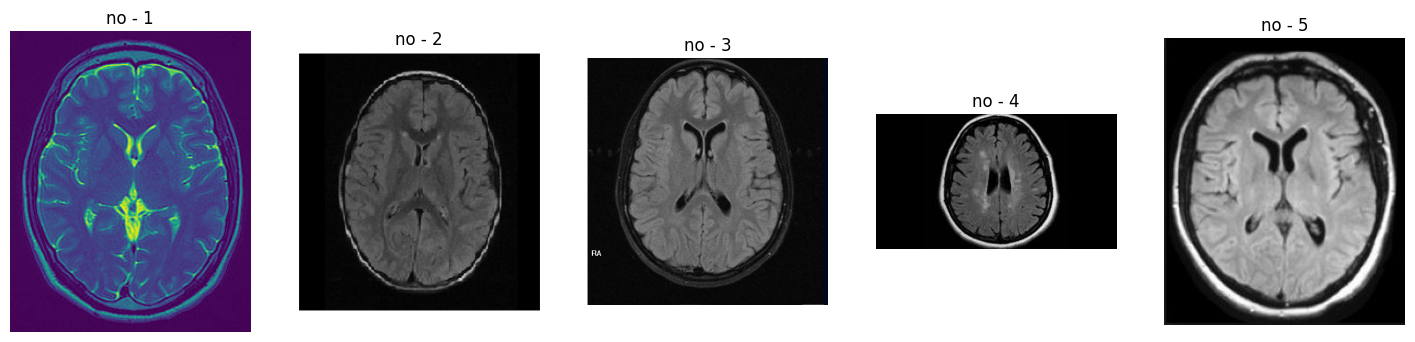

In [ ]:
# Defining the class names
class_names = ['yes', 'no']

# Define the number of images to display for each class
num_images_to_display = 5

# Visualization of images
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)  # Directory path
    print(f"Displaying images for class {class_name}:")
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(18, 12))

    for i, filename in enumerate(os.listdir(class_path)[:num_images_to_display]):
        img_path = os.path.join(class_path, filename)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f'{class_name} - {i+1}')
        axes[i].axis('off')

    plt.show()

In [ ]:
# Defining a dictionary to map class names to labels (e.g., 'yes' to 1, 'no' to 0)
class_mapping = {'yes': 1, 'no': 0}

# Creating an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Looping through both "yes" and "no" directories and apply data augmentation
for class_name, class_label in class_mapping.items():
    class_path = os.path.join(dataset_path, class_name)
    output_path = os.path.join(dataset_path, class_name + '_augmented')

    # Creating the output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for filename in os.listdir(class_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)

            # Apply data augmentation
            augmented_images = []
            for i in range(1):  # Generate 10 augmented versions of each image
                augmented_img = datagen.random_transform(img)
                save_path = os.path.join(output_path, f"{filename.split('.')[0]}_aug_{i}.jpg")
                cv2.imwrite(save_path, augmented_img)

print("Data augmentation and saving completed.")

Data augmentation and saving completed.


In [ ]:
# Looping through the class names
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name + '_augmented')

    # Creating a new directory to save the histogram-equalized images
    output_path = os.path.join(dataset_path, class_name + '_augmented_equalized')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Looping through the images in the augmented directory
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)

            # Converting the image to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Applying histogram equalization
            img_equalized = cv2.equalizeHist(img_gray)

            # Saving the equalized image
            save_path = os.path.join(output_path, filename)
            cv2.imwrite(save_path, img_equalized)

print("Histogram equalization on augmented images completed.")

Histogram equalization on augmented images completed.


In [ ]:
# Looping through the class names
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name + '_augmented_equalized')

    # Creating a new directory to save the Canny edge-detected images
    output_path = os.path.join(dataset_path, class_name + '_augmented_equalized')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Looping through the images in the blurred directory
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

            # Applying Canny edge detection
            edges = cv2.Canny(img, 100, 200)  # You can adjust the threshold values

            # Saving the edge-detected image
            save_path = os.path.join(output_path, filename)
            cv2.imwrite(save_path, edges)

print("Canny edge detection on equalized and blurred images completed.")

Canny edge detection on equalized and blurred images completed.


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

# Defining the target image size (48x48 pixels as per the model input shape)
target_size = (48, 48)

# looping through the class names
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)  # Directory path
    class_label = 1 if class_name == 'yes' else 0

    # looping through the images in the directory
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_path, filename)

            # Loading the image and resize it to the target size
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            img = cv2.resize(img, target_size)

            images.append(img)
            labels.append(class_label)

# Converting lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Spliting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data preprocessing and reshaping
X_train = X_train.reshape(-1, target_size[0], target_size[1], 1)
X_valid = X_valid.reshape(-1, target_size[0], target_size[1], 1)
X_test = X_test.reshape(-1, target_size[0], target_size[1], 1)

# Initializing the model
model = Sequential()

# Convolutional Blocks
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening the output
model.add(Flatten())

# Fully connected Blocks
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(1, activation='softmax'))

# Compiling the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Building the model
model.build(input_shape=(None, 48, 48, 1))

model.summary()

# Training the model
batch_size = 64
epochs = 200

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_35 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_35 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
# Define the target image size (224x224 pixels)
target_size = (224, 224)

# Looping through the class names
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)  # Directory path
    class_label = 1 if class_name == 'yes' else 0

    # Looping through the images in the directory
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_path, filename)

            # Loading the image and resize it to the target size
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting to RGB format
            img = cv2.resize(img, target_size)

            images.append(img)
            labels.append(class_label)

# Converting lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Spliting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# Loading a pre-trained model (VGG-16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Adding custom layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Freezing the pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

datagen.fit(X_train)

# Training the model
batch_size = 32
epochs = 20

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy (VGG-16): {test_accuracy}')

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
3/3 [==============================] - 16s 4s/step - loss: 0.7020 - accuracy: 0.4370 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 2s 666ms/step - loss: 0.6995 - accuracy: 0.4622 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6978 - accuracy: 0.4286 - val_loss: 0.6956 - val_accuracy: 0.6154
Epoch 4/20
3/3 [==============================] - 2s 583ms/step - loss: 0.6899 - accuracy: 0.5126 - val_loss: 0.6939 - val_accuracy: 0.5769
Epoch 5/20
3/3 [==============================] - 3s 792ms/step - loss: 0.6862 - accuracy: 0.6050 - val_loss: 0.6914 - val_accuracy: 0.5385
Epoch 6/20
3/3 [==============================] - 2s 574ms/step - loss: 0.6867 - accuracy: 0.5798 - val_loss: 0.6881 - val_accuracy: 0.5385
Epoch 7/20
3/3 [==============================] - 2s 443ms/step - loss: 0.6785 - accuracy: 0.5966 - 

In [ ]:
# Defining the target image size (224x224 pixels)
target_size = (224, 224)

# Looping through the class names
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)  # Directory path
    class_label = 1 if class_name == 'yes' else 0

    # Looping through the images in the directory
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_path, filename)

            # Loading the image and resize it to the target size
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting to RGB format
            img = cv2.resize(img, target_size)

            images.append(img)
            labels.append(class_label)

# Converting lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Spliting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loading a pre-trained model (ResNet-50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Adding custom layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Freezing the pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

datagen.fit(X_train)

# Training the model
batch_size = 32
epochs = 20

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy (ResNet-50): {test_accuracy}')


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
3/3 [==============================] - 9s 1s/step - loss: 0.7194 - accuracy: 0.5042 - val_loss: 0.6962 - val_accuracy: 0.4615
Epoch 2/20
3/3 [==============================] - 2s 466ms/step - loss: 0.6959 - accuracy: 0.4874 - val_loss: 0.6673 - val_accuracy: 0.6538
Epoch 3/20
3/3 [==============================] - 3s 662ms/step - loss: 0.6997 - accuracy: 0.4958 - val_loss: 0.6593 - val_accuracy: 0.5769
Epoch 4/20
3/3 [==============================] - 2s 433ms/step - loss: 0.6975 - accuracy: 0.4958 - val_loss: 0.6564 - val_accuracy: 0.6923
Epoch 5/20
3/3 [==============================] - 2s 403ms/step - loss: 0.6919 - accuracy: 0.5042 - val_loss: 0.6598 - val_accuracy: 0.7692
Epoch 6/20
3/3 [==============================] - 2s 403ms/step - loss: 0.6876 - accuracy: 0.5546 - val_loss: 0.6676 - val_accuracy: 0.5385
Epoch 7/20
3/3 [==============================] - 2s 427ms/step - loss: 0.6903 - accuracy: 0.5042 

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Loading a pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Adding custom layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Freezing the pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model (remaining the same)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model (remaining the same)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)

# Evaluating the model on the test set (remaining the same)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy (InceptionV3): {test_accuracy}')


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
3/3 [==============================] - 15s 2s/step - loss: 0.6940 - accuracy: 0.5630 - val_loss: 0.7292 - val_accuracy: 0.5769
Epoch 2/20
3/3 [==============================] - 1s 424ms/step - loss: 0.6070 - accuracy: 0.6303 - val_loss: 0.5724 - val_accuracy: 0.7308
Epoch 3/20
3/3 [==============================] - 2s 624ms/step - loss: 0.5618 - accuracy: 0.7731 - val_loss: 0.5166 - val_accuracy: 0.7308
Epoch 4/20
3/3 [==============================] - 3s 719ms/step - loss: 0.5456 - accuracy: 0.7227 - val_loss: 0.4869 - val_accuracy: 0.8462
Epoch 5/20
3/3 [==============================] - 2s 404ms/step - loss: 0.4528 - accuracy: 0.7983 - val_loss: 0.4758 - val_accuracy: 0.8077
Epoch 6/20
3/3 [==============================] - 2s 425ms/step - loss: 0.4733 - accuracy: 0.7983 - val_loss: 0.4250 - val_accuracy: 0.8462
Epoch 7/20
3/3 [==============================] - 2s 461ms/step - loss: 0.4344 - accuracy: 0.8319

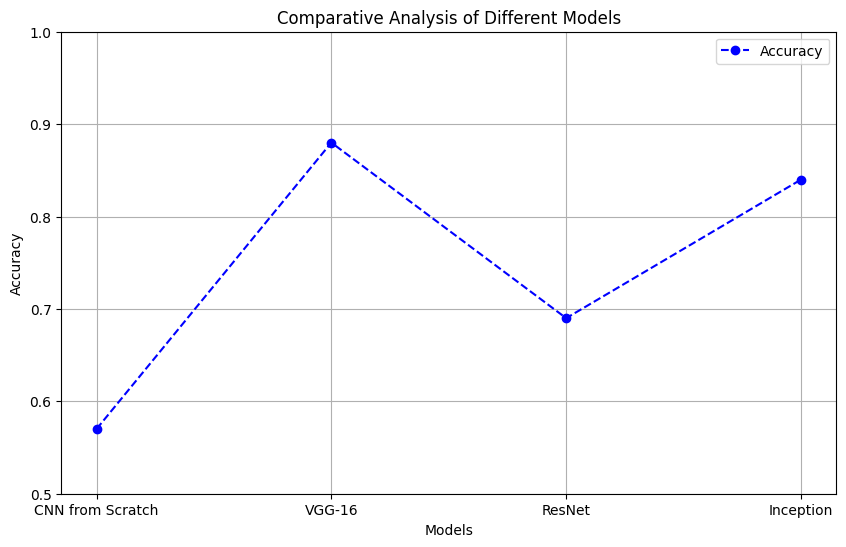

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the model names and their respective accuracies
models = ['CNN from Scratch', 'VGG-16', 'ResNet', 'Inception']
accuracies = [0.57, 0.88, 0.69, 0.84]

# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='--', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparative Analysis of Different Models')
plt.legend()
plt.ylim(0.5, 1.0)
plt.grid(True)  #grid
plt.show()

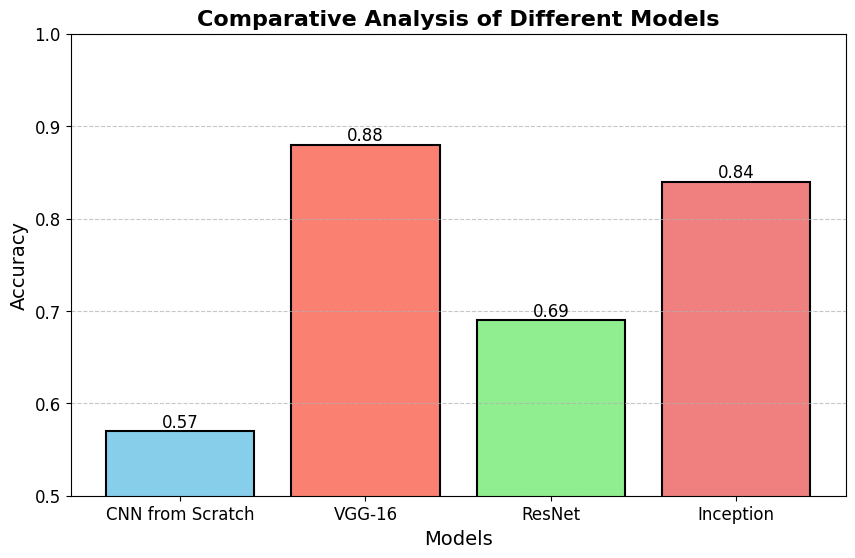

In [ ]:
# Defining the model names and their respective accuracies
models = ['CNN from Scratch', 'VGG-16', 'ResNet', 'Inception']
accuracies = [0.57, 0.88, 0.69, 0.84]

# Defining custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

# Creating a bar plot with custom styles
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparative Analysis of Different Models', fontsize=16, fontweight='bold')

# Adding data labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Customizing the appearance
plt.ylim(0.5, 1.0)  # Adjusting the y-axis limits as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);



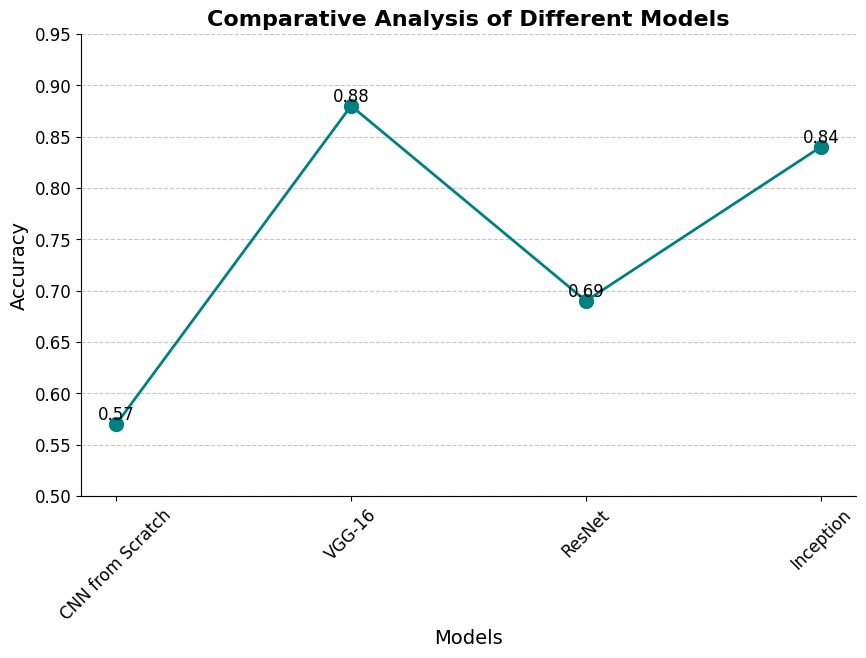

In [ ]:
models = ['CNN from Scratch', 'VGG-16', 'ResNet', 'Inception']
accuracies = [0.57, 0.88, 0.69, 0.84]

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.plot(models, accuracies, marker='o', color='teal', linewidth=2, markersize=10, label='Model Accuracies')

# Adding points as text
for i, txt in enumerate(accuracies):
    ax.text(models[i], accuracies[i], f"{accuracies[i]:.2f}", ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Comparative Analysis of Different Models', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adding grid and customizing the appearance
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(np.arange(0.5, 1.0, 0.05), fontsize=12)

# Showing plot
plt.show()

In [ ]:
import pandas as pd
analysis = pd.DataFrame({'Model': ['CNN from Scratch','VGG-16','ResNet','Inception'],
                         'Val_Accuracy': ['0.42','0.74','0.80','0.88'],
                         'Step-loss': ['4.7','0.65','0.66','0.27'],
                         'Val-loss': ['1.03','0.63','0.60','0.31']})
analysis

,Model,Val_Accuracy,Step-loss,Val-loss
0,CNN from Scratch,0.42,4.7,1.03
1,VGG-16,0.74,0.65,0.63
2,ResNet,0.80,0.66,0.60
3,Inception,0.88,0.27,0.31


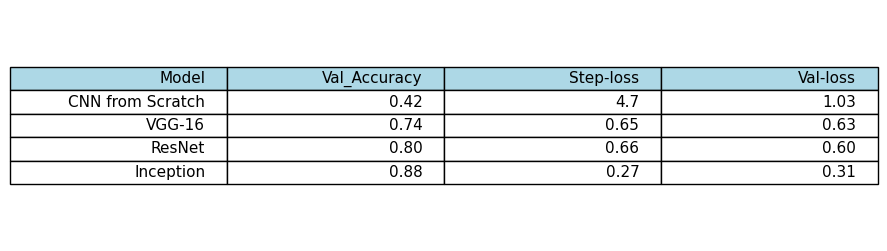

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Model': ['CNN from Scratch','VGG-16','ResNet','Inception'],
        'Val_Accuracy': ['0.42','0.74','0.80','0.88'],
        'Step-loss': ['4.7','0.65','0.66','0.27'],
        'Val-loss': ['1.03','0.63','0.60','0.31']}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

cell_text = [df.columns] + df.values.tolist()
cell_colors = [['lightblue']*len(df.columns)] + [['w']*len(df.columns) for _ in range(len(df))]

the_table = ax.table(cellText=cell_text, cellColours=cell_colors, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(11)
the_table.scale(1.4, 1.4)

plt.show()


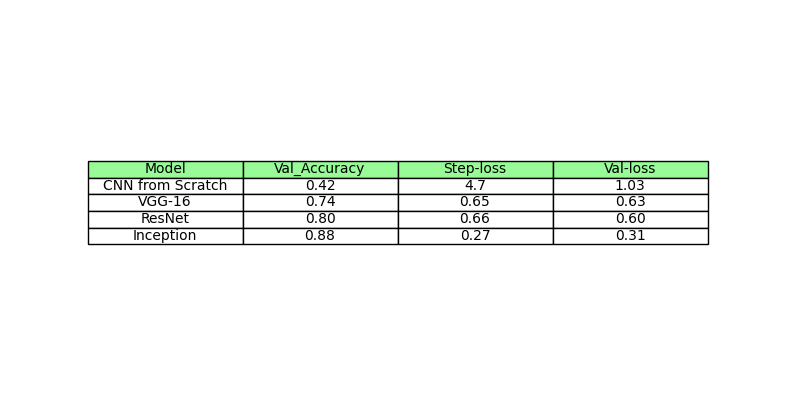

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Model': ['CNN from Scratch','VGG-16','ResNet','Inception'],
        'Val_Accuracy': ['0.42','0.74','0.80','0.88'],
        'Step-loss': ['4.7','0.65','0.66','0.27'],
        'Val-loss': ['1.03','0.63','0.60','0.31']}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center',
         colColours=['palegreen']*4, colWidths=[0.2, 0.2, 0.2, 0.2])

plt.show()
